<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/RedesNeuronalesLog%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo ADALINE** Este modelo busca el pronóstico del Score para un grupo de solicitantes de crédito

0. Se procede con las cargas de la librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf


Mounted at /content/drive


1. Se procede con la carga de la base de datos

In [ ]:
XDB=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/0. SolicitantesCrédito(USD).xlsx',sheet_name=1)
XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)','Prob.Default (PD)','Score']]
XDB=XDB.dropna()

#Se cargan los datos en bruto
XD=np.array(XDB[['Edad','Ingresos','Egresos','Monto (EAD)']])
yd=np.array(XDB[['Prob.Default (PD)']])

#Procedemos con la normalización
XDn=XD/np.max(XD,axis=0) #Axis=0 busca el max por columnas
ydp=yd #El valor deaseado o de aprendizaje es una probabilidad

2. Procedemos a implementar nuestro primer modelo neuronal-ADALINE (Adaptive Linear)

In [ ]:
NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='sigmoid', use_bias=False, input_dim=NE))  #Se utiliza la función logística "sigmoid"
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydp, epochs=250, batch_size=581) #batch size se recomienda un 10% de los datos
ys=model.predict(XDn)


Epoch 1/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0886
Epoch 2/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 3/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0848
Epoch 4/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0830
Epoch 5/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0812
Epoch 6/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 7/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0777
Epoch 8/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0761
Epoch 9/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0744
Epoch 10/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 11/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 12/250
11/11 [==============================] - 0s 2ms/step - loss: 0.0697
Epoch 13/250
11/11 [=================

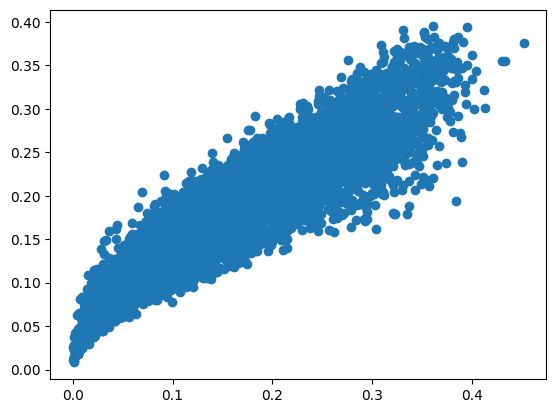

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydp,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydp,ys)))
print("La correlación es:",df.corr())

La correlación es:           0         1
0  1.000000  0.915548
1  0.915548  1.000000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()
print("Los efectos independintes son:\n",W)

Los efectos independintes son:
 [array([[-1.4775965 ],
       [-2.3770063 ],
       [-0.44699457],
       [-1.4051348 ]], dtype=float32)]


<Figure size 640x480 with 0 Axes>

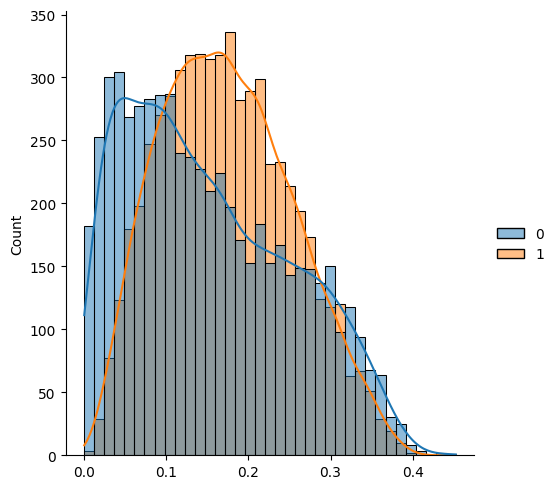

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydp.flatten(),ys.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm=(np.mean(ydp)-np.mean(ys))/np.mean(ydp)  #Un modelo bueno debe tener una discrepancia cercana a 5 (muy complicado que de esto)
print("La discrepancia entre medias es:",dscm*100)
#Si da negativo el modelo esta sobre estimando los datos
#Si da positivo los datos me estan quedando por debajo de la linea de referencia

La discrepancia entre medias es: -14.59287949804555


In [ ]:
#Discrepancia entre desviaciones
dscv=(np.std(ydp)-np.std(ys))/np.std(ydp)
print("La discrepancia entre dispersiones:",dscv*100)

La discrepancia entre dispersiones: 20.497217138452562


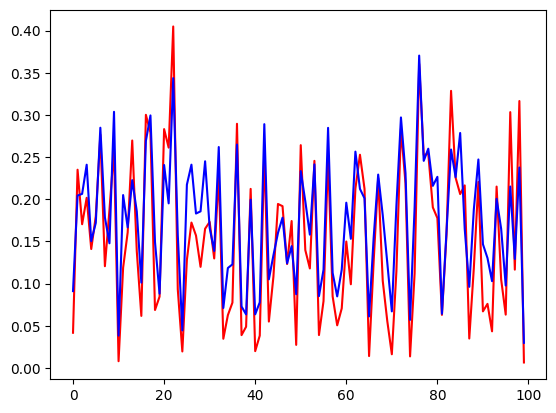

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(ydp[0:100,],'r',ys[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

In [ ]:
#Como predecir la probabilidad de una persona especifica (Edad:34, Ingresos:1800, Egresos:750, Monto:1000)
XDi=np.array([34,1800,750,1000])

#Normalizar las variables
XDin=XDi/np.max(XD,axis=0)

#Probabilidad del Individuo
ypi=model.predict(XDin.reshape(1,4))
print("La probabilidad de default para esta personas es:",ypi) #La persona de 100 cuotas se va a atrasar en __

1/1 [==============================] - 0s 124ms/step
La probabilidad de default para esta personas es: [[0.0712055]]


3. Modelo MADALINE (Multi-Adaptive Linear)

In [ ]:
yd2=np.array(XDB[['Score']])
yd2c=(yd2-np.mean(yd2))/np.std(yd2) #Se hace el Centramiento
yd2p=1/(1+np.exp(-yd2c)) #Esta es la probabilidad de un score alto

NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(10, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,yd2p, epochs=250, batch_size=600) #Recorre la tabla 100 veces pero cada vez que lo hace elimina el 10% de los datos
ys=model.predict(XDn)


Epoch 1/250
10/10 [==============================] - 1s 3ms/step - loss: 0.0509
Epoch 2/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 3/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 4/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 5/250
10/10 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 6/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 7/250
10/10 [==============================] - 0s 3ms/step - loss: 0.0401
Epoch 8/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 9/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 10/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0365
Epoch 11/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0354
Epoch 12/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 13/250
10/10 [=================

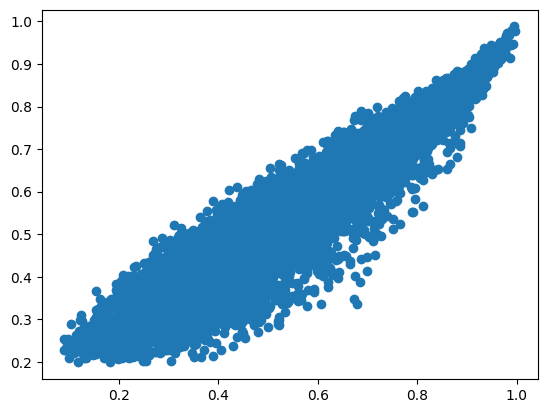

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(yd2p,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df2=pd.DataFrame(np.column_stack((yd2p,ys)))
df2.corr()

,0,1
0,1.000000,0.923299
1,0.923299,1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

print("Los efectos independientes son:\n",np.dot(W2,C2))

Los efectos independientes son:
 [[ 1.0469927 ]
 [ 3.2366881 ]
 [-0.15951943]
 [ 2.7588947 ]]


<Figure size 640x480 with 0 Axes>

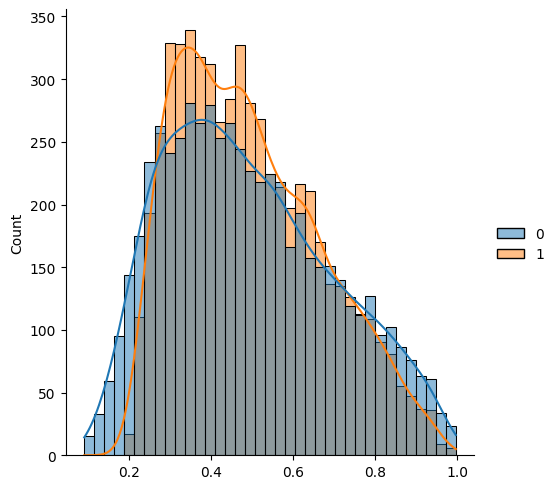

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((yd2p.flatten(),ys.flatten()),kde=True)
plt.show()

In [ ]:
#Discrepancia de las medias
dscm2=(np.mean(yd2p)-np.mean(ys))/np.mean(yd2p)
print("La discrepancia entre medias es:",dscm2*100)

La discrepancia entre medias es: -0.6747161796325323


In [ ]:
#Discrepancia entre desviaciones
dscv2=(np.std(yd2p)-np.std(ys))/np.std(yd2p)
print("La discrepancia entre dispersiones:",dscv2*100)

La discrepancia entre dispersiones: 14.257687085045475


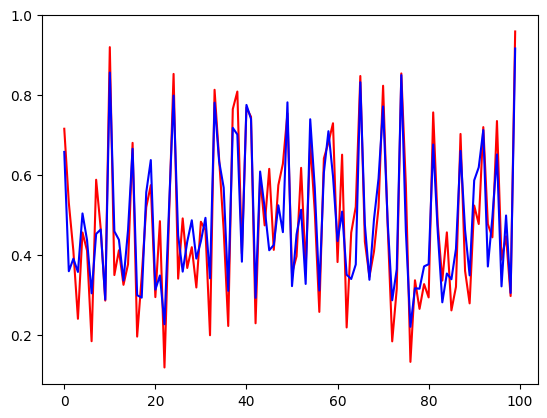

In [ ]:
#La Grafica de los datos de referencia es:
plt.figure()
plt.plot(yd2p[0:100,],'r',ys[0:100,],'b') #Nada más estoy graficando 100 datos #DATOS DE REFERENCIA ROJOS Y LOS AZULES SON LOS QUE ME ARROJA EL MODELO
plt.show()

In [ ]:
#Como predecir la probabilidad de una persona especifica (Edad:34, Ingresos:1800, Egresos:750, Monto:1000)
XDi=np.array([34,1800,750,1000])

#Normalizar las variables
XDin=XDi/np.max(XD,axis=0)

#Probabilidad del Individuo
ypi2=model.predict(XDin.reshape(1,4))
print("La probabilidad de default para esta personas es:",ypi2) #En un __ la persona tiene ingresos altos

1/1 [==============================] - 0s 25ms/step
La probabilidad de default para esta personas es: [[0.7980046]]
